In [45]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#import statsmodels.api as sm
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OrdinalEncoder

In [65]:
#Guardamos datos de entrenamiento (en la fuente ya vienen separados los archivos de entrenamiento y de test)
# La data se puede descargar desde https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/
df = pd.read_csv('C:/Users/qnava/OneDrive/Escritorio/train.csv')
df.drop(columns=['Id'], inplace=True)
df.head()

#leemos dataset de test
df_test = pd.read_csv('C:/Users/qnava/OneDrive/Escritorio/test.csv')
df_test.drop(columns=['Id'], inplace=True)

Tenemos 79 variables (quitando ID) y una objetivo (SalePrice).

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [68]:
#Podemos observar que hay varias columnas con datos nulos, pero podemos limpiarlas al reemplazarlas
#por 0 o con N/As dadas las descripciones de las columnas
number_columns = df.select_dtypes(include=['float','int']).columns.drop('SalePrice')
object_columns = df.select_dtypes(include=['object']).columns

df[number_columns] = df[number_columns].fillna(0)
df[object_columns] = df[object_columns].fillna("N/A")

#Para test
df_test[number_columns] = df_test[number_columns].fillna(0)
df_test[object_columns] = df_test[object_columns].fillna("N/A")

In [69]:
#Verificamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [71]:
#Realizamos EDA para las variables numericas
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


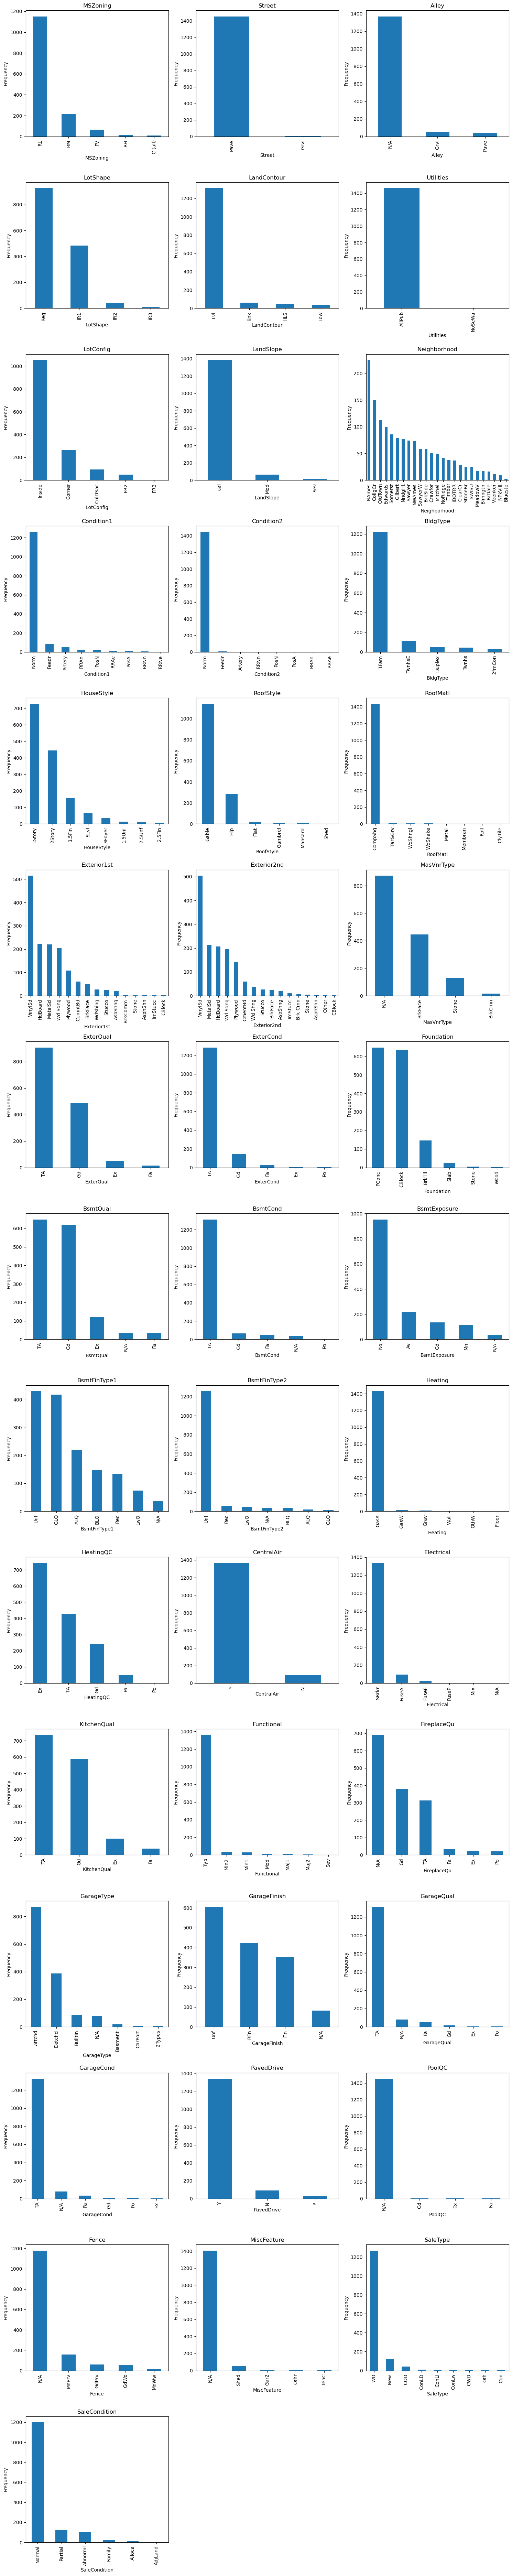

In [72]:
#Realizamos EDA para las variables categoricas
# Filter columns with dtype 'object'
object_columns = df.select_dtypes(include='object').columns

# Calculate the number of subplots needed and the number of rows required
num_plots = len(object_columns)
num_rows = math.ceil(num_plots / 3)

# Define figure size based on the number of subplots and desired subplots per row
plt.figure(figsize=(15, 5*num_rows))

# Loop through each object column and plot its value counts
for i, col in enumerate(object_columns, 1):
    plt.subplot(num_rows, 3, i)
    plt1 = df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt1.set(xlabel=col, ylabel='Frequency')

plt.tight_layout()
plt.show()

C:\Users\qnava\AppData\Local\Temp\ipykernel_4132\1459021595.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)


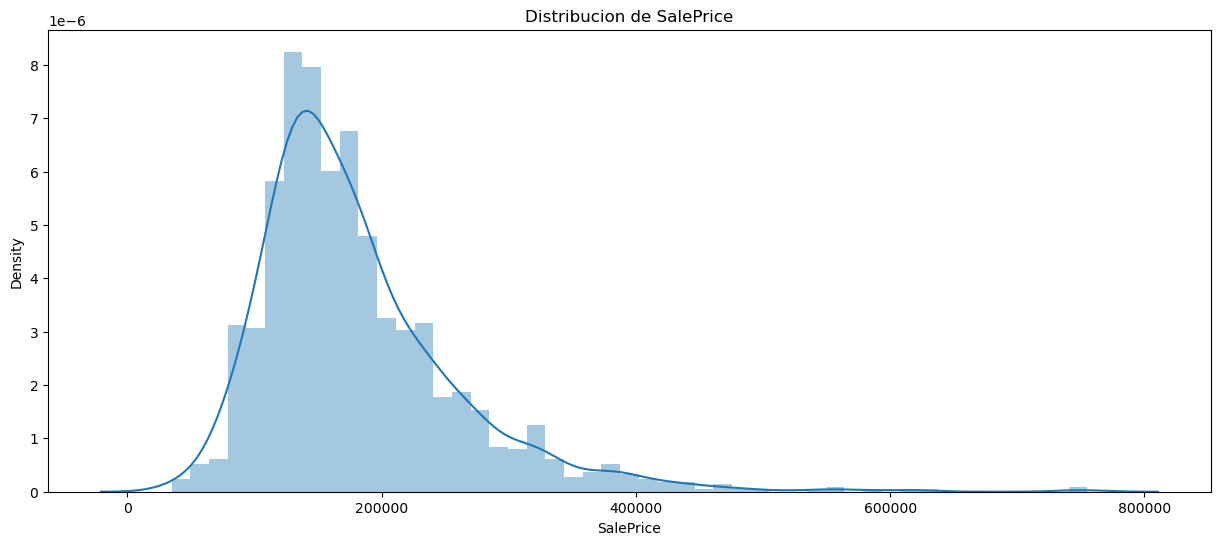

In [73]:
#Realizamos EDA para la variable objetivo
plt.figure(figsize=(15,6))

plt.plot()
plt.title('Distribucion de SalePrice')
sns.distplot(df.SalePrice)

plt.show()

In [74]:
#Aplicamos transformacion OrdinalEncoder para datos categoricos

# Concatenar df y df_test
combined_df = pd.concat([df, df_test])

# Ajustar el encoder en el dataset combinado
encoder = OrdinalEncoder()
combined_df[object_columns] = encoder.fit_transform(combined_df[object_columns])

# Transformar ambos df y df_test
df[object_columns] = encoder.transform(df[object_columns])
df_test[object_columns] = encoder.transform(df_test[object_columns])

print(df)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60       4.0         65.0     8450     1.0    1.0       3.0   
1             20       4.0         80.0     9600     1.0    1.0       3.0   
2             60       4.0         68.0    11250     1.0    1.0       0.0   
3             70       4.0         60.0     9550     1.0    1.0       0.0   
4             60       4.0         84.0    14260     1.0    1.0       0.0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60       4.0         62.0     7917     1.0    1.0       3.0   
1456          20       4.0         85.0    13175     1.0    1.0       3.0   
1457          70       4.0         66.0     9042     1.0    1.0       3.0   
1458          20       4.0         68.0     9717     1.0    1.0       3.0   
1459          20       4.0         75.0     9937     1.0    1.0       3.0   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0 

In [76]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,...,0,3.0,4.0,1.0,0,2,2008,9.0,4.0,208500
1,20,4.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,...,0,3.0,4.0,1.0,0,5,2007,9.0,4.0,181500
2,60,4.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,...,0,3.0,4.0,1.0,0,9,2008,9.0,4.0,223500
3,70,4.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,...,0,3.0,4.0,1.0,0,2,2006,9.0,0.0,140000
4,60,4.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,...,0,3.0,4.0,1.0,0,12,2008,9.0,4.0,250000


In [77]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3.0,80.0,11622,1.0,1.0,3.0,3.0,0.0,4.0,...,120,0,3.0,2.0,1.0,0,6,2010,9.0,4.0
1,20,4.0,81.0,14267,1.0,1.0,0.0,3.0,0.0,0.0,...,0,0,3.0,4.0,0.0,12500,6,2010,9.0,4.0
2,60,4.0,74.0,13830,1.0,1.0,0.0,3.0,0.0,4.0,...,0,0,3.0,2.0,1.0,0,3,2010,9.0,4.0
3,60,4.0,78.0,9978,1.0,1.0,0.0,3.0,0.0,4.0,...,0,0,3.0,4.0,1.0,0,6,2010,9.0,4.0
4,120,4.0,43.0,5005,1.0,1.0,0.0,1.0,0.0,4.0,...,144,0,3.0,4.0,1.0,0,1,2010,9.0,4.0


In [78]:
#Hacemos correlaciones para identificar posibles variables más significativas.
correlation = df.corr()['SalePrice']
correlation_sorted = correlation.abs().sort_values(ascending=False)
for column_name in correlation_sorted.index:
    print(f"{column_name}: {correlation[column_name]}")

SalePrice: 1.0
OverallQual: 0.7909816005838053
GrLivArea: 0.7086244776126515
GarageCars: 0.6404091972583519
ExterQual: -0.6368836943991116
GarageArea: 0.6234314389183622
TotalBsmtSF: 0.6135805515591943
1stFlrSF: 0.6058521846919153
BsmtQual: -0.593733919103818
KitchenQual: -0.5911752847263666
FullBath: 0.5606637627484453
TotRmsAbvGrd: 0.5337231555820284
YearBuilt: 0.5228973328794967
YearRemodAdd: 0.5071009671113866
MasVnrArea: 0.4726144990045735
Fireplaces: 0.46692883675152763
GarageFinish: -0.4256842542080416
GarageType: -0.4152830684529039
HeatingQC: -0.400177543162901
BsmtFinSF1: 0.3864198062421535
Foundation: 0.3824789911901013
WoodDeckSF: 0.32441344456812926
2ndFlrSF: 0.31933380283206736
OpenPorchSF: 0.31585622711605504
BsmtExposure: -0.2945887840317781
HalfBath: 0.28410767559478256
LotArea: 0.2638433538714051
GarageYrBlt: 0.2613664351029629
LotShape: -0.2555798704871225
CentralAir: 0.2513281638401552
GarageCond: 0.24670527437161902
Electrical: 0.2370439741696797
PavedDrive: 0.2313

In [79]:
#Separamos variables para entrenamiento y prueba
X = df.drop(['SalePrice'],axis=1)
Y = df['SalePrice']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [80]:
Test_Y

1436    120500
57      196500
780     176000
382     213500
1170    171000
         ...  
1328    256000
1033    230000
977     199900
661     402000
914     173733
Name: SalePrice, Length: 292, dtype: int64

In [82]:
#Estandarizamos las variables.

std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)

Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)

#Para las del dataset de test del concurso
Test2_X = df_test
Test2_X_std = std.transform(Test2_X)
Test2_X_std = pd.DataFrame(Test2_X_std, columns=X.columns)

#Mostramos ejemplo para train
Train_X_std.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1168.000000,1.168000e+03,...,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1168.000000,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,-8.516779e-17,-1.946692e-16,-7.300097e-17,4.866731e-17,2.600659e-16,-8.212609e-17,-6.995926e-17,7.528225e-17,0.000000,-3.878176e-17,...,2.433366e-17,-1.216683e-17,-1.551271e-15,-6.995926e-17,-2.555034e-16,0.000000,-5.018816e-17,-7.486705e-14,-4.653812e-16,-1.125432e-16
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428,1.000428e+00,...,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00
min,-8.785477e-01,-5.034994e+00,-1.697926e+00,-9.327983e-01,-1.705872e+01,-3.943288e+00,-1.386826e+00,-3.842414e+00,-0.029273,-1.808904e+00,...,-2.646438e-01,-5.823501e-02,-2.135588e+01,-3.361093e+00,-2.930378e+00,-0.083201,-1.950125e+00,-1.356055e+00,-4.837349e+00,-3.407881e+00
25%,-8.785477e-01,7.555189e-03,-4.380216e-01,-3.024926e-01,5.862104e-02,6.520668e-02,-1.386826e+00,3.220829e-01,-0.029273,-1.201952e+00,...,-2.646438e-01,-5.823501e-02,5.499369e-02,4.493963e-01,-1.834426e-01,-0.083201,-8.547038e-01,-6.050489e-01,3.011122e-01,2.180858e-01
50%,-1.734558e-01,7.555189e-03,1.186805e-01,-9.459345e-02,5.862104e-02,6.520668e-02,7.473145e-01,3.220829e-01,-0.029273,6.189039e-01,...,-2.646438e-01,-5.823501e-02,5.499369e-02,4.493963e-01,-1.834426e-01,-0.083201,-1.244229e-01,1.459576e-01,3.011122e-01,2.180858e-01
75%,2.966054e-01,7.555189e-03,6.167824e-01,1.131024e-01,5.862104e-02,6.520668e-02,7.473145e-01,3.220829e-01,-0.029273,6.189039e-01,...,-2.646438e-01,-5.823501e-02,5.499369e-02,4.493963e-01,-1.834426e-01,-0.083201,6.058580e-01,8.969640e-01,3.011122e-01,2.180858e-01
max,3.116973e+00,1.268192e+00,7.473008e+00,2.081732e+01,5.862104e-02,4.073701e+00,7.473145e-01,3.220829e-01,34.161382,6.189039e-01,...,7.294196e+00,2.002194e+01,5.499369e-02,4.493963e-01,5.310428e+00,28.480437,2.066420e+00,1.647971e+00,3.011122e-01,1.124577e+00


In [86]:
#Modelo 1
#Ejecutamos Regresion Lineal (sin hacer feature selection ni eliminando multicolinealidad)

# Creamos modelo
model = LinearRegression()
model.fit(Train_X_std, Train_Y)

# Guardamos coeficientes
coefficients = model.coef_

coefficients_df1 = pd.DataFrame({
    'Feature': Train_X_std.columns,
    'Coefficient': coefficients
})

# Hacemos predicciones, incluyendo las del dataset de test
y_train_pred = model.predict(Train_X_std)
y_test_pred = model.predict(Test_X_std)
y_test2_pred = model.predict(Test2_X_std)

# Evaluamos
mse_train = mean_squared_error(Train_Y, y_train_pred)
r2_train = r2_score(Train_Y, y_train_pred)
mse_test = mean_squared_error(Test_Y, y_test_pred)
r2_test = r2_score(Test_Y, y_test_pred)

# Guardamos resultados
results_df = pd.DataFrame({
    'Model': ["RegrLineal"],
    'MSE Train': [mse_train],
    'R-squared Train': [r2_train],
    'MSE Test': [mse_test],
    'R-squared Test': [r2_test]
})

results_df

,Model,MSE Train,R-squared Train,MSE Test,R-squared Test
0,RegrLineal,8.709019e+08,0.861228,2.797582e+09,0.564856


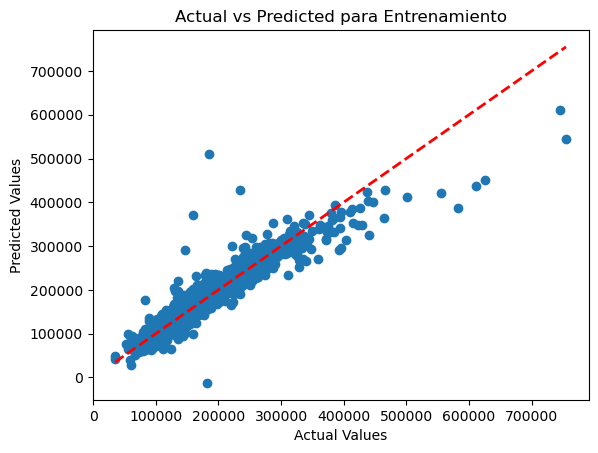

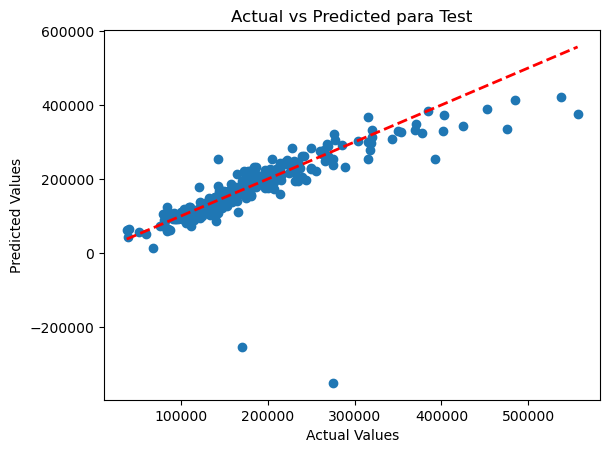

In [87]:
#Graficamos resultados de predicción

# Entrenamiento
plt.scatter(Train_Y, y_train_pred)
plt.plot([min(Train_Y), max(Train_Y)], [min(Train_Y), max(Train_Y)], linestyle='--', color='red', linewidth=2)  # 1:1 line
plt.title('Actual vs Predicted para Entrenamiento')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Test
plt.scatter(Test_Y, y_test_pred)
plt.plot([min(Test_Y), max(Test_Y)], [min(Test_Y), max(Test_Y)], linestyle='--', color='red', linewidth=2)  # 1:1 line
plt.title('Actual vs Predicted para Test')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [25]:
#Intentemos mejorar modelo al reducir multicolinealidad con RFE

Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    # Ejecutamos RFE
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-5)
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

print('Variables seleccionadas: ',Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_fs = Train_X_std.loc[:,rfe.support_]
Test_X_fs = Test_X_std.loc[:,rfe.support_]

Variables seleccionadas:  Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF'

In [26]:
Test_X_fs.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,2.920000e+02,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,-0.056745,-0.099978,-0.047788,0.021024,-0.058621,0.202484,-0.024971,0.065367,-2.927282e-02,0.117961,...,-0.164729,-0.025891,0.198751,0.136289,-0.042773,-0.111737,-0.034388,0.037936,-0.018676,0.050447
std,0.969203,1.116389,1.075411,1.071592,1.414205,0.987415,1.011955,0.906212,1.077375e-16,0.915519,...,0.753309,0.781993,1.523660,1.934662,1.020117,1.145388,0.933570,0.986350,0.978554,0.988471
min,-0.878548,-4.932268,-1.697926,-0.909111,-17.058722,-3.943288,-1.386826,-3.842414,-2.927282e-02,-1.808904,...,-0.377120,-0.116888,-0.264644,-0.058235,-14.218925,-3.361093,-1.950125,-1.356055,-4.823891,-3.407881
25%,-0.878548,-0.066652,-0.672423,-0.276467,0.058621,0.065207,-1.386826,0.322083,-2.927282e-02,0.618904,...,-0.377120,-0.116888,-0.264644,-0.058235,0.054994,0.449396,-0.489563,-0.605049,0.308703,0.218086
50%,-0.173456,-0.066652,0.206581,-0.129362,0.058621,0.065207,0.747314,0.322083,-2.927282e-02,0.618904,...,-0.377120,-0.116888,-0.264644,-0.058235,0.054994,0.449396,-0.124423,0.145958,0.308703,0.218086
75%,0.061575,-0.066652,0.616782,0.119533,0.058621,0.065207,0.747314,0.322083,-2.927282e-02,0.618904,...,-0.377120,-0.116888,-0.264644,-0.058235,0.054994,0.449396,0.605858,0.896964,0.308703,0.218086
max,3.116973,1.555220,7.473008,15.099330,0.058621,4.073701,0.747314,0.322083,-2.927282e-02,0.618904,...,4.608158,7.910122,9.436541,22.810854,0.054994,0.449396,2.066420,1.647971,0.308703,1.124577


In [91]:
#Modelo 2
#Ejecutamos Regresion Lineal con feature selection

# Creamos modelo
model2 = LinearRegression()
model2.fit(Train_X_fs, Train_Y)

# Guardamos coeficientes
coefficients2 = model2.coef_

coefficients_df2 = pd.DataFrame({
    'Feature': Train_X_fs.columns,
    'Coefficient': coefficients2
})

# Hacemos predicciones
y_train_pred2 = model2.predict(Train_X_fs)
y_test_pred2 = model2.predict(Test_X_fs)

# Evaluamos
mse_train = mean_squared_error(Train_Y, y_train_pred2)
r2_train = r2_score(Train_Y, y_train_pred2)
mse_test = mean_squared_error(Test_Y, y_test_pred2)
r2_test = r2_score(Test_Y, y_test_pred2)

# Guardamos resultados
results_df2 = pd.DataFrame({
    'Model': ["RegrLineal_FeatSelect"],
    'MSE Train': [mse_train],
    'R-squared Train': [r2_train],
    'MSE Test': [mse_test],
    'R-squared Test': [r2_test]
})

results_df2

,Model,MSE Train,R-squared Train,MSE Test,R-squared Test
0,RegrLineal_FeatSelect,8.595394e+08,0.863038,2.759500e+09,0.570779


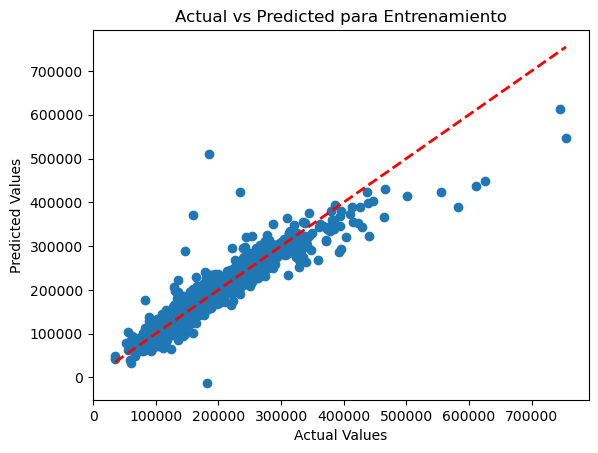

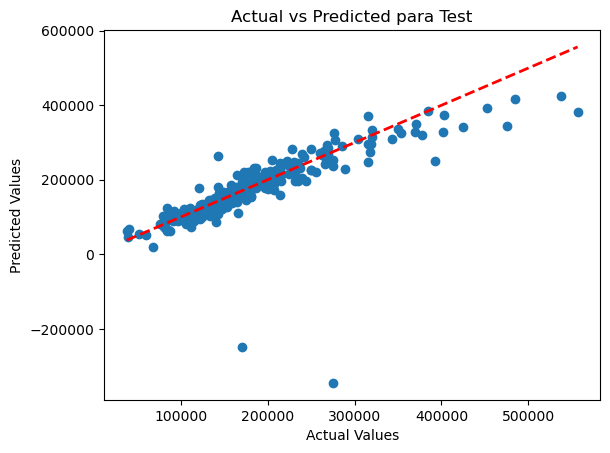

In [92]:
#Graficamos resultados de predicción

# Entrenamiento
plt.scatter(Train_Y, y_train_pred2)
plt.plot([min(Train_Y), max(Train_Y)], [min(Train_Y), max(Train_Y)], linestyle='--', color='red', linewidth=2)  # 1:1 line
plt.title('Actual vs Predicted para Entrenamiento')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Test
plt.scatter(Test_Y, y_test_pred2)
plt.plot([min(Test_Y), max(Test_Y)], [min(Test_Y), max(Test_Y)], linestyle='--', color='red', linewidth=2)  # 1:1 line
plt.title('Actual vs Predicted para Test')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

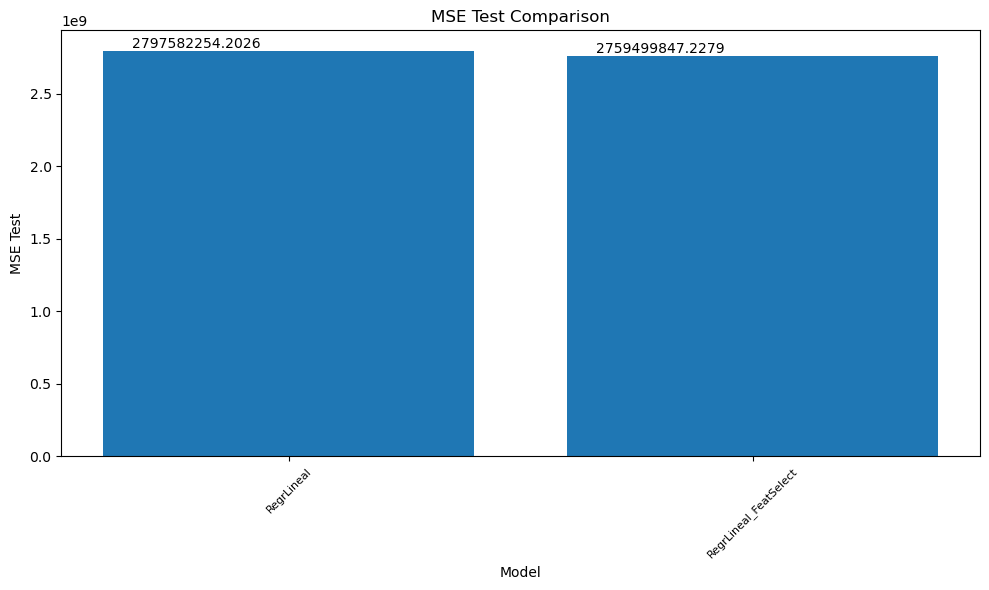

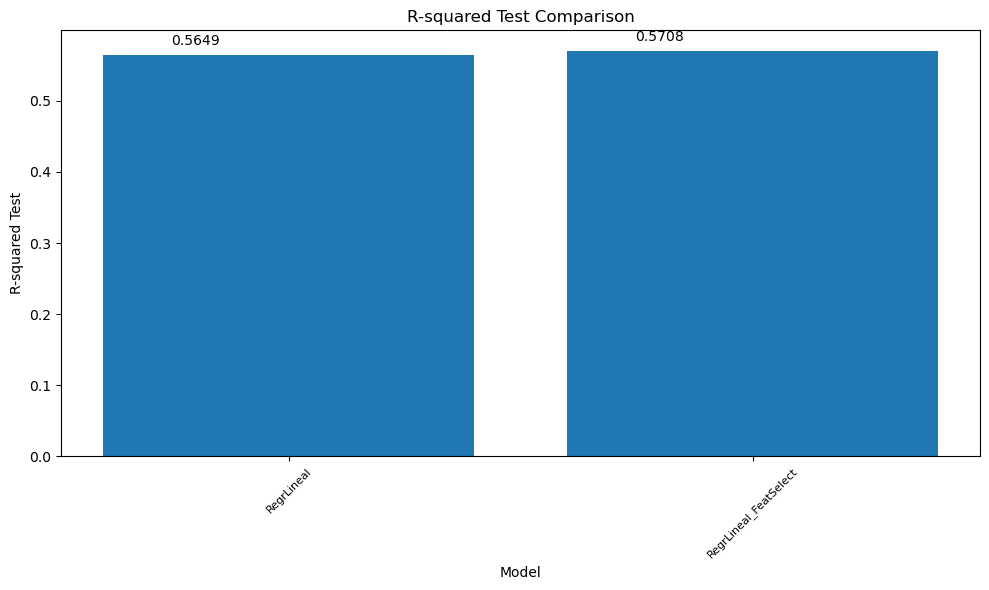

In [93]:
# Extraer resultados de los diferentes modelos
mse_test_values = [
    results_df['MSE Test'].values[0],
    results_df2['MSE Test'].values[0]
    
]
r2_test_values = [
    results_df['R-squared Test'].values[0],
    results_df2['R-squared Test'].values[0]
]

# Graficar 'MSE Test'
plt.figure(figsize=(10, 6))
bars = plt.bar(
    ['RegrLineal', 'RegrLineal_FeatSelect'],
    mse_test_values
)
plt.title('MSE Test Comparison')
plt.xlabel('Model')
plt.ylabel('MSE Test')
for bar, value in zip(bars, mse_test_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 0.01, f'{value:.4f}', ha='center', va='bottom')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

# Graficar 'R-squared Test'
plt.figure(figsize=(10, 6))
bars = plt.bar(
    ['RegrLineal', 'RegrLineal_FeatSelect'],
    r2_test_values
)
plt.title('R-squared Test Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared Test')
for bar, value in zip(bars, r2_test_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 0.01, f'{value:.4f}', ha='center', va='bottom')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

El mejor modelo es la Regresión Lineal con feature selection por una mínima diferencia, aunque se podría intentar reducir el número de variables necesarias para que valiera la pena.

In [94]:
# Fusionamos los DataFrames con sufijos únicos para evitar columnas duplicadas
merged_coefficients_df = pd.merge(coefficients_df1, coefficients_df2, on='Feature', how='outer', suffixes=('_1', '_2'))

# Renombramos las columnas
merged_coefficients_df = merged_coefficients_df.rename(columns={
    'Coefficient_1': 'Coefficient_Regression_Simple',
    'Coefficient_2': 'Coefficient_Regression_FeatSelection'
})

# Mostramos el DataFrame resultante
merged_coefficients_df


,Feature,Coefficient_Regression_Simple,Coefficient_Regression_FeatSelection
0,MSSubClass,-3497.684446,-3455.168039
1,MSZoning,-901.922631,-1045.357392
2,LotFrontage,-254.280346,-385.257228
3,LotArea,2681.690544,2733.683778
4,Street,2198.874518,2168.671277
...,...,...,...
74,MiscVal,104.018093,NaN
75,MoSold,-1138.797897,-1178.567210
76,YrSold,-1815.238511,-1824.864253
77,SaleType,-384.607528,-504.893645


In [97]:
# Finalmente presentamos el valor predecido de las casas del dataset de test.
for i, value in enumerate(y_test2_pred):
    print(f"{i}: {value}")

0: 104857.68037979427
1: 162361.02718244813
2: 165705.79041370485
3: 188839.24813017526
4: 181018.2819131757
5: 169454.73533811813
6: 183144.05566822772
7: 165394.80100048738
8: 202635.26456180774
9: 110769.41096254738
10: 201578.5232757067
11: 99681.02834262454
12: 88425.59437072957
13: 141225.5089179959
14: 108067.94658959539
15: 341819.07816800015
16: 243678.35492645827
17: 297212.3720851854
18: 284553.9342110872
19: 439678.84727168665
20: 292836.083912821
21: 213253.17593719333
22: 181817.4486514397
23: 165028.68607842445
24: 198334.02532359536
25: 211093.97355681896
26: 278570.96934597014
27: 247812.77362240004
28: 191467.768686204
29: 239352.66306676433
30: 211939.93256609712
31: 85773.23825219252
32: 200328.62532966657
33: 294874.21497465426
34: 268396.64753315726
35: 242330.0584230464
36: 173022.2862731445
37: 168413.31520630675
38: 163771.26415047678
39: 161523.25632987215
40: 210862.95653773512
41: 149760.05688085826
42: 290123.88334804855
43: 238769.00659267232
44: 228501.24